In [ ]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
HOME = "/drive/My Drive/Susun Jadwal/Data csv/"

user = pd.read_csv(HOME+"user.csv")
user_sched = pd.read_csv(HOME+"user_schedule.csv")

user['last_update_course_at'] = pd.to_datetime(user['last_update_course_at'])
user_sched['created_at'] = pd.to_datetime(user_sched['created_at'])

In [ ]:
last_update = user['last_update_course_at']
created_at = user_sched['created_at']

last_update = last_update[last_update >= created_at.min()]
time_activeness = pd.concat([last_update, created_at], ignore_index=True) # Data for plot datetime trend
time_activeness.head()

0   2021-08-03 06:03:53.099000+00:00
1   2021-08-10 01:35:58.502000+00:00
2   2021-08-02 04:36:04.560000+00:00
3   2021-08-01 08:41:21.690000+00:00
4   2021-08-08 10:43:59.398000+00:00
dtype: datetime64[ns, UTC]

In [ ]:
# Reference : https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc
def split_day(x):
  time = int(x[-2:])
  if 5 <= time < 12:
    return "Morning"
  elif 12 <= time < 17:
    return "Afternoon"
  elif 17 <= time < 21:
    return "Evening"
  else:
    return "Night"

In [ ]:
# Data for plot time trend
time_split = pd.DataFrame({"datetime":time_activeness.dt.strftime('%Y-%m-%d'), 
                           "time":time_activeness.dt.strftime('%Y-%m-%d %H').apply(split_day)})
time_split.head()

,datetime,time
0,2021-08-03,Morning
1,2021-08-10,Night
2,2021-08-02,Night
3,2021-08-01,Morning
4,2021-08-08,Morning


# Plot datetime trend
There are 4 plot options:
* Plot total sunjad usages trend per hour
* Plot total sunjad usages trend per 6 hours
* Plot total sunjad usages trend per 12 hours
* Plot total sunjad usages trend per day

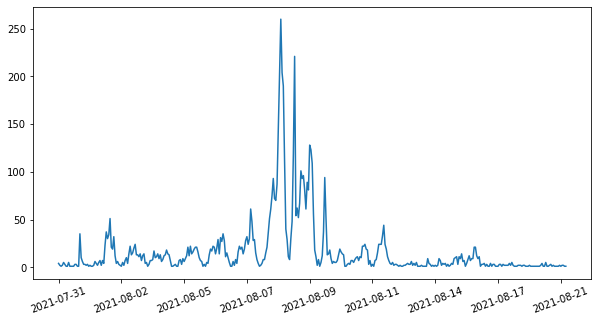

In [ ]:
# Plot total sunjad usages per hour
plt.figure(figsize=(10,5))
ax = time_activeness.dt.strftime('%Y-%m-%d %H').value_counts().sort_index().plot()
plt.xticks(rotation=20)

labels = [item.get_text()[:-3] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.show()

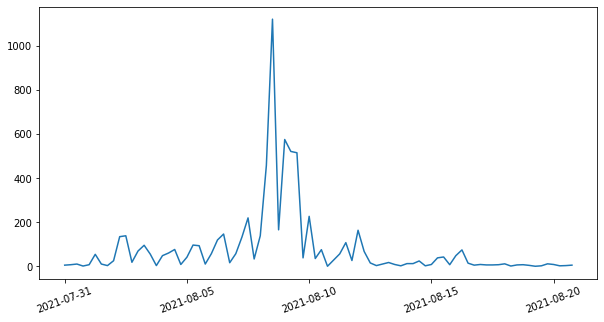

In [ ]:
# Plot total sunjad usages per 6 hours
plt.figure(figsize=(10,5))
ax = time_activeness.dt.strftime('%Y-%m-%d %H').apply(lambda x: str(x[:-2]) + str(int(x[-2:])//6)).value_counts().sort_index().plot()
plt.xticks(rotation=20)

labels = [item.get_text()[:-2] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.show()

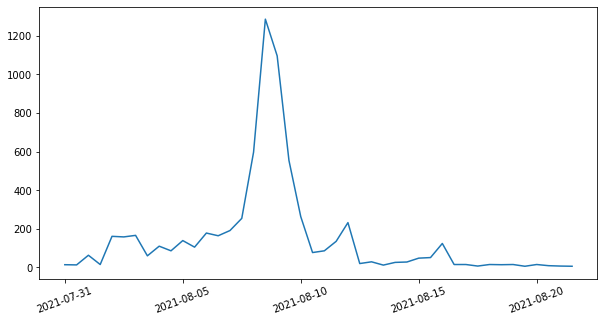

In [ ]:
# Plot total sunjad usages per 12 hours
plt.figure(figsize=(10,5))
ax = time_activeness.dt.strftime('%Y-%m-%d %H').apply(lambda x: str(x[:-2]) + str(int(x[-2:])//12)).value_counts().sort_index().plot()
plt.xticks(rotation=20)

labels = [item.get_text()[:-2] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.show()

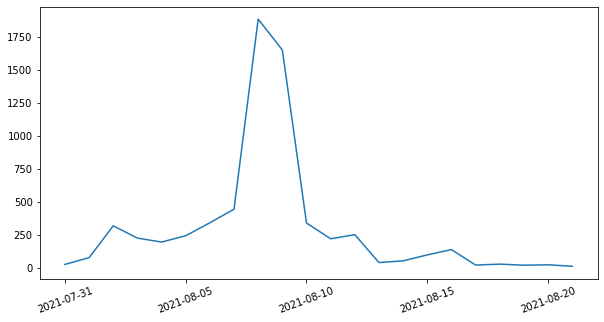

In [ ]:
# Plot total sunjad usages per day
plt.figure(figsize=(10,5))
ax = time_activeness.dt.strftime('%Y-%m-%d').value_counts().sort_index().plot()
plt.xticks(rotation=20)
plt.show()

# Plot time (morning, afternoon, evening) trend
There are 4 plot options:
* Plot total sunjad usages by time
* Percentage of sunjad usages by time
* Plot total sunjad usages trend per time
* Plot normalized total sunjad usages per time

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


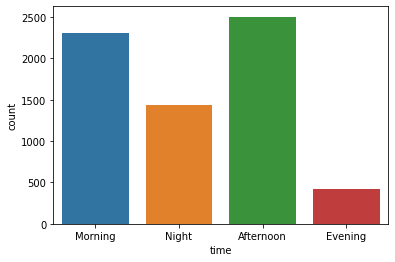

In [ ]:
# Plot total sunjad usages by time
sns.countplot(time_split.time)

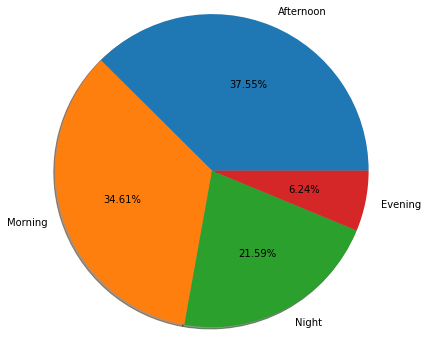

In [ ]:
# Percentage of sunjad usages by time
count_time = time_split.time.value_counts()
plt.pie(count_time, labels=count_time.index, autopct='%.2f%%', shadow=True, radius = 1.8)
plt.show()

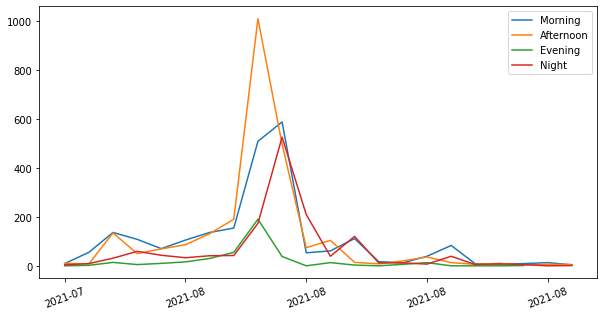

In [ ]:
# Plot total sunjad usages trend per time
plt.figure(figsize=(10,5))
ax = time_split.query('time=="Morning"')["datetime"].rename('Morning').value_counts().sort_index().plot()
ax = time_split.query('time=="Afternoon"')["datetime"].rename('Afternoon').value_counts().sort_index().plot()
ax = time_split.query('time=="Evening"')["datetime"].rename('Evening').value_counts().sort_index().plot()
ax = time_split.query('time=="Night"')["datetime"].rename('Night').value_counts().sort_index().plot()
plt.xticks(rotation=20)

labels = [item.get_text()[:-3] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.legend()
plt.show()

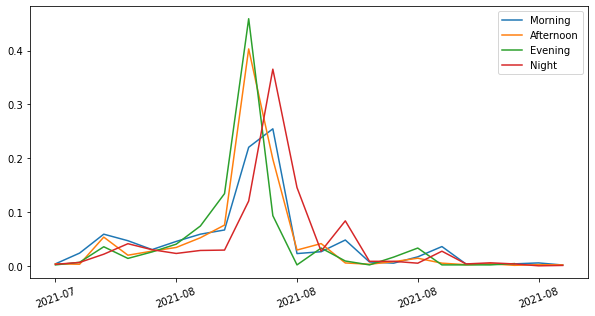

In [ ]:
# Plot normalized total sunjad usages per time
plt.figure(figsize=(10,5))
ax = time_split.query('time=="Morning"')["datetime"].rename('Morning').value_counts(normalize=True).sort_index().plot()
ax = time_split.query('time=="Afternoon"')["datetime"].rename('Afternoon').value_counts(normalize=True).sort_index().plot()
ax = time_split.query('time=="Evening"')["datetime"].rename('Evening').value_counts(normalize=True).sort_index().plot()
ax = time_split.query('time=="Night"')["datetime"].rename('Night').value_counts(normalize=True).sort_index().plot()
plt.xticks(rotation=20)

labels = [item.get_text()[:-3] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.legend()
plt.show()